In [1]:
import matplotlib.pyplot as plt;
import pandas as pd;
import plotly.express as px;

In [2]:
df = pd.read_csv("Onyx Data - DataDNA Dataset Challenge - April 2022 - Nobel Prize Winners.csv")
df.head(5)

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44


In [3]:
df.shape

(923, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   firstname              923 non-null    object
 1   surname                921 non-null    object
 2   born_country_code      923 non-null    object
 3   died_country_code      617 non-null    object
 4   gender                 923 non-null    object
 5   year                   923 non-null    int64 
 6   category               923 non-null    object
 7   share                  923 non-null    int64 
 8   name_of_university     697 non-null    object
 9   city_of_university     692 non-null    object
 10  country_of_university  693 non-null    object
 11  born_month             923 non-null    object
 12  age                    923 non-null    int64 
 13  age_get_prize          923 non-null    int64 
dtypes: int64(4), object(10)
memory usage: 101.1+ KB


In [5]:
df.isnull().sum()

In [6]:
df["died_country_code"].fillna("No Country of death", inplace = True)
df["name_of_university"].fillna("No University name", inplace = True)
df["city_of_university"].fillna("No University city", inplace = True)
df["country_of_university"].fillna("No University country", inplace = True)

In [7]:
df.isnull().sum()

### Question 1: What countries have produced the most Nobel Price winners? (Top 10)**

In [8]:
country_code = pd.read_csv("wikipedia-iso-country-codes (1).csv")
country_code.head()

,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Zimbabwe,ZW,ZWE,716,ISO 3166-2:ZW
1,Zambia,ZM,ZMB,894,ISO 3166-2:ZM
2,Yemen,YE,YEM,887,ISO 3166-2:YE
3,Western Sahara,EH,ESH,732,ISO 3166-2:EH
4,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF


In [9]:
df1 = df.merge(country_code,
    left_on='born_country_code',
    right_on='Alpha-2 code',
    how='left'
)

df1.head(5)

,firstname,surname,born_country_code,died_country_code,gender,year,category,share,name_of_university,city_of_university,country_of_university,born_month,age,age_get_prize,English short name lower case,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Wilhelm Conrad,Röntgen,DE,DE,male,1901,physics,1,Munich University,Munich,Germany,Mar,78,56,Germany,DE,DEU,276,ISO 3166-2:DE
1,Hendrik A.,Lorentz,NL,NL,male,1902,physics,2,Leiden University,Leiden,the Netherlands,Jul,75,49,Netherlands,NL,NLD,528,ISO 3166-2:NL
2,Pieter,Zeeman,NL,NL,male,1902,physics,2,Amsterdam University,Amsterdam,the Netherlands,May,78,37,Netherlands,NL,NLD,528,ISO 3166-2:NL
3,Henri,Becquerel,FR,FR,male,1903,physics,2,École Polytechnique,Paris,France,Dec,56,51,France,FR,FRA,250,ISO 3166-2:FR
4,Pierre,Curie,FR,FR,male,1903,physics,4,École municipale de physique et de chimie indu...,Paris,France,May,47,44,France,FR,FRA,250,ISO 3166-2:FR


In [10]:
df1.drop(columns=['ISO 3166-2', 'Numeric code', 'Alpha-3 code'], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 0 to 922
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   firstname                      923 non-null    object
 1   surname                        921 non-null    object
 2   born_country_code              923 non-null    object
 3   died_country_code              923 non-null    object
 4   gender                         923 non-null    object
 5   year                           923 non-null    int64 
 6   category                       923 non-null    object
 7   share                          923 non-null    int64 
 8   name_of_university             923 non-null    object
 9   city_of_university             923 non-null    object
 10  country_of_university          923 non-null    object
 11  born_month                     923 non-null    object
 12  age                            923 non-null    int64 
 13  age_g

In [11]:
df1.rename(columns={'English short name lower case': 'Country_of_Birth'}, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 0 to 922
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   firstname              923 non-null    object
 1   surname                921 non-null    object
 2   born_country_code      923 non-null    object
 3   died_country_code      923 non-null    object
 4   gender                 923 non-null    object
 5   year                   923 non-null    int64 
 6   category               923 non-null    object
 7   share                  923 non-null    int64 
 8   name_of_university     923 non-null    object
 9   city_of_university     923 non-null    object
 10  country_of_university  923 non-null    object
 11  born_month             923 non-null    object
 12  age                    923 non-null    int64 
 13  age_get_prize          923 non-null    int64 
 14  Country_of_Birth       923 non-null    object
 15  Alpha-2 code           

In [12]:
Winner_per_country = df1.groupby('Country_of_Birth')['surname'].count().head(10).sort_values(ascending=False)
Winner_per_country

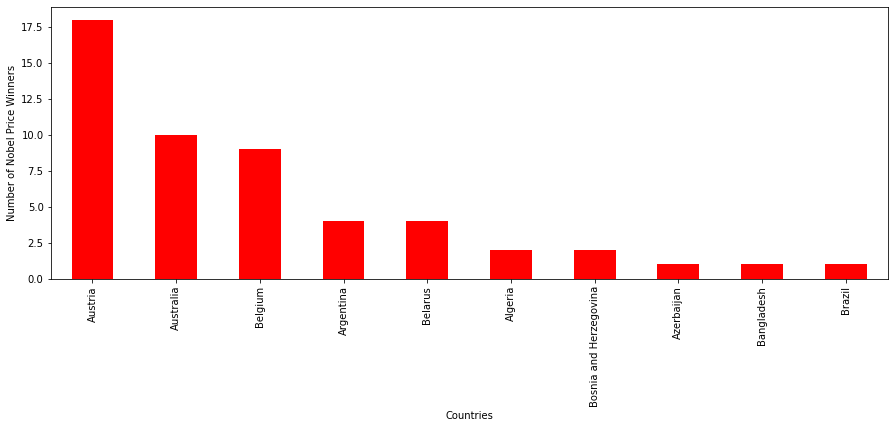

In [14]:
Winner_per_country.plot(
    kind="bar",
    figsize=(15, 5),
    ylabel="Number of Nobel Price Winners",
    xlabel="Countries",
    color="red",
);